## Assignment 2.3

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


In [84]:
def update_particle_test(particle, velocity, ybest, yglobalbest):
    xcurrent1 = particle[0,:]
    xcurrent2 = particle[1,:]    
    velocity1 = particle[2,:]
    velocity2 = particle[3,:]
    w = 0.72
    constant1 = 1.49
    constant2 = 1.49
    random1 = np.random.uniform(0,1)
    random2 = np.random.uniform(0,1)
    new_velocity = np.zeros((2,2))
    
    
    new_velocity[0,0] = w*velocity1[0] + constant1*random1*(ybest[0,0] - xcurrent1[0]) + constant2*random2*(yglobalbest[0,0] - xcurrent1[0])
    
    new_velocity[0,1] = w*velocity1[1] + constant1*random1*(ybest[0,1] - xcurrent1[1]) + constant2*random2*(yglobalbest[0,1] - xcurrent1[1])
    
    new_velocity[1,0] = w*velocity2[0] + constant1*random1*(ybest[1,0] - xcurrent2[0]) + constant2*random2*(yglobalbest[1,0] - xcurrent2[0])
    
    new_velocity[1,1] = w*velocity2[1] + constant1*random1*(ybest[1,1] - xcurrent2[1]) + constant2*random2*(yglobalbest[1,1] - xcurrent2[1])
    

    return new_velocity
new_velo = update_particle_test(particle_swarm[0],particle_velocity[0],current_best_particle[0],goat_particle_swarm)
print(new_velo)

IndexError: index 2 is out of bounds for axis 0 with size 2

In [97]:
def update_particle(particle, velocity, ybest, yglobalbest):
    w = 0.72
    constant1 = 1.49
    constant2 = 1.49
    
    random1,random2 = np.random.uniform(0, 1, (2, velocity.shape[1]))
    velocity = (w*velocity) + (constant1*random1*(particle - ybest)) + (constant2*random2*(particle - yglobalbest))
    
    return velocity
new_velo = update_particle(particle_swarm[0],particle_velocity[0],current_best_particle[0],goat_particle_swarm)
print(new_velo)

[[  25301.32476931 -121418.09084535]
 [ 154642.93475678  -35475.75826236]]


In [98]:
def update(particle, velocity, gbest, lbest, w, a1, a2):
    r1, r2 = np.random.uniform(0, 1, (2, *velocity.shape))
    velocity = (w*velocity) + (a1*r1*(particle - lbest)) + (a2*r2*(particle - gbest))
    
    return velocity


In [121]:
def update_position(particle, new_velocity):
    xcurrent1 = particle[0,:]
    xcurrent2 = particle[1,:]    
    
    x1 = np.min([1.0,np.max([-1.0,xcurrent1[0] + new_velocity[0,0]])])
    y1 = np.min([1.0,np.max([-1.0,xcurrent1[1] + new_velocity[0,1]])])
    x2 = np.min([1.0,np.max([-1.0,xcurrent2[0] + new_velocity[1,0]])])
    y2 = np.min([1.0,np.max([-1.0,xcurrent2[1] + new_velocity[1,1]])])
    
    return [x1,y1],[x2,y2]
    

In [124]:
def distancetest(data,centroid):
    x = data[0]-centroid[0]
    y = data[1]-centroid[1]
    
    distance = np.sqrt(x**2 + y**2)
    return distance
test = [0.4,0.5]
cent = [0.2,-0.3]
#print(distance(test,cent))

In [110]:
def distance(data, centroid):
    return np.sqrt(np.sum((data - centroid)**2))
test = np.asarray([0.4,0.5])
cent = np.asarray([0.2,-0.3])
print(distance(test,cent))

0.8246211251235323


In [111]:
def fitness(particle, data,label):
    dist0 = 0
    dist1 = 0
    count0 = 0
    count1 = 0

    for i in range(len(label)):
        if label[i]==0:
            dist0 += distance(data[i,:],particle[0,:])
            count0 += 1
        else:
            dist1 += distance(data[i,:],particle[1,:])
            count1 += 1
    if count0 == 0:
        count0+=1
    if count1 == 0:
        count1+=1
    dist = dist0/count0 + dist1/count1
    
    return dist

In [112]:
def update_current_best(particle,current_best_particle,data,label):
    best = np.zeros((2,2))
    if fitness(particle,data,label)<fitness(current_best_particle,data,label):
        
        best = particle[:2,:]
    else:
        best = current_best_particle
    return best
    

In [113]:
def update_label(particle,data):
    label = np.zeros(data.shape[0])

    for i in range(data.shape[0]):
        
        if distance(data[i],particle[0,:])>distance(data[i],particle[1,:]):
            label[i] = 0
        else:
            label[i] = 1
    return label

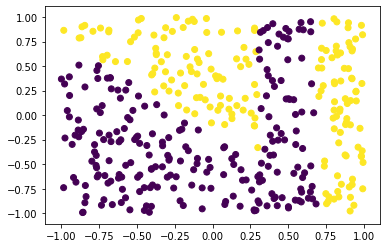

In [114]:
n = 10
k = 2
d = 2
particle_swarm = np.random.uniform(-1,1, (n,k,d))
particle_velocity = np.random.uniform(-1,1, (n,k,d))

current_best_particle = np.zeros((n,k,d))
goat_particle_swarm = np.zeros((k,d))



for i in range(n):
    #current and global best particles
    current_best_particle[i,0,:] = particle_swarm[i,0,:]
    current_best_particle[i,1,:] = particle_swarm[i,1,:]
    
goat_particle_swarm[0,:] = particle_swarm[0,0,:]
goat_particle_swarm[1,:] = particle_swarm[0,1,:]

datapoints = np.random.uniform(-1,1,(400,2))
datapoint_true_label = np.zeros(400)
datapoint_true_label = [1 if x[0] >= 0.7 or (x[0] <=0.3 and x[1] >= (-0.2 - x[0])) else 0 for x in datapoints]
datapoint_working_label = np.random.randint(0, 2, 400, dtype=int)

plt.scatter(datapoints[:,0],datapoints[:,1],c = datapoint_true_label)
plt.show()
#plt.scatter(datapoints[:,0],datapoints[:,1],c = datapoint_working_label)


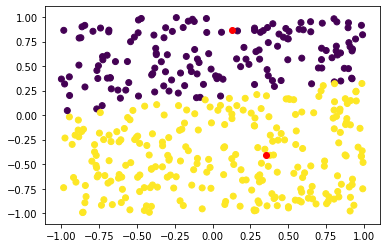

In [123]:
for i in range(100):
    for p in range(n):
        new_velo = update_particle(particle_swarm[p],particle_velocity[p],current_best_particle[p],goat_particle_swarm)
        new_pos1,new_pos2 = update_position(particle_swarm[p],new_velo)
        
        particle_swarm[p,0,:] = new_pos1
        particle_swarm[p,1,:] = new_pos2
        particle_velocity[p,0,:] = new_velo[0,:]
        particle_velocity[p,1,:] = new_velo[1,:]
        
        datapoint_working_label = update_label(particle_swarm[p],datapoints)
        
        best = update_current_best(particle_swarm[p],current_best_particle[p],datapoints,datapoint_working_label)
        current_best_particle[p] = best
    for g in range(n):
        if fitness(goat_particle_swarm,datapoints,datapoint_working_label)>fitness(particle_swarm[g],datapoints,datapoint_working_label):
            goat_particle_swarm = particle_swarm[g,:2]
    
    datapoint_working_label = update_label(goat_particle_swarm,datapoints)
            
plt.scatter(datapoints[:,0],datapoints[:,1],c = datapoint_working_label)
#print(goat_particle_swarm)
plt.scatter(goat_particle_swarm[:,0],goat_particle_swarm[:,1],c = 'red')
plt.show()
#plt.scatter(current_best_particle[0,:,0],current_best_particle[0,:,1],c ='b')

In [116]:
#pso(datapoints,datapoint_working_label,10)

In [46]:
kmeans = KMeans(n_clusters=2).fit(datapoints)
print(kmeans.cluster_centers_)

[[ 0.53627388 -0.04759621]
 [-0.51059413  0.02676243]]


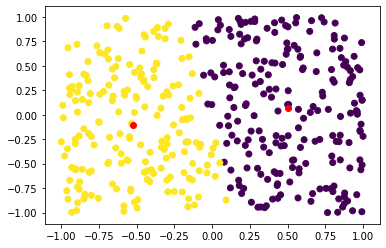

In [25]:
plt.scatter(datapoints[:,0],datapoints[:,1],c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c = 'red')

In [15]:
data =  pd.read_csv('iris.data', sep=",")

data = data.to_numpy()

iris1 = data[:,:2]
iris2 = data[:,2:4]
irislabel = data[:,4]
print(irislabel)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [ ]:
# iris sepal
